In [134]:
# Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [135]:
# Reading the data
df = pd.read_csv('/content/Cardiotocographic.csv')
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


### Data Cleaning and Preparation:

In [136]:
# Counting the NAN values in the data
df.isna().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [137]:
# Filling the NAN values with the median values of their corresponding columns.
df.fillna(df.median(), inplace=True)

In [103]:
df.isna().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [104]:
df.columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

In [105]:
# Detection of Outliers

for col in df.columns:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  print(f"Number of outliers in {col}: {outliers.shape[0]}")



Number of outliers in LB: 10
Number of outliers in AC: 43
Number of outliers in FM: 347
Number of outliers in UC: 13
Number of outliers in DL: 125
Number of outliers in DS: 120
Number of outliers in DP: 284
Number of outliers in ASTV: 10
Number of outliers in MSTV: 80
Number of outliers in ALTV: 318
Number of outliers in MLTV: 81
Number of outliers in Width: 10
Number of outliers in Tendency: 10
Number of outliers in NSP: 559


### Statistical Summary

In [107]:
# Mean
df.mean()

LB          133.340204
AC            0.003204
FM            0.009894
UC            0.004391
DL            0.001895
DS            0.000002
DP            0.000173
ASTV         46.995984
MSTV          1.364378
ALTV         10.285964
MLTV          8.276147
Width        70.395387
Tendency      0.313246
NSP           1.301499
dtype: float64

In [108]:
# Median
df.median()

LB          133.000000
AC            0.001634
FM            0.000000
UC            0.004484
DL            0.000000
DS            0.000000
DP            0.000000
ASTV         49.000000
MSTV          1.200000
ALTV          0.000000
MLTV          7.400000
Width        67.000000
Tendency      0.000000
NSP           1.000000
dtype: float64

In [109]:
# Standard deviation
df.std()

LB          11.214379
AC           0.004373
FM           0.067540
UC           0.003340
DL           0.003343
DS           0.000141
DP           0.000836
ASTV        18.813973
MSTV         1.173632
ALTV        21.205041
MLTV         7.734851
Width       42.720508
Tendency     0.643186
NSP          0.642133
dtype: float64

In [110]:
# IQR
for column in df.columns:
  if df[column].dtype != 'object':
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    print(f" {column} : {IQR}")



 LB : 14.0
 AC : 0.0056061275
 FM : 0.00256657125
 UC : 0.004685357249999999
 DL : 0.003289474
 DS : 0.0
 DP : 0.0
 ASTV : 29.0
 MSTV : 1.0
 ALTV : 11.0
 MLTV : 6.200000000000001
 Width : 63.0
 Tendency : 1.0
 NSP : 0.0


In [111]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.340204,0.003204,0.009894,0.004391,0.001895,0.000002,0.000173,46.995984,1.364378,10.285964,8.276147,70.395387,0.313246,1.301499
std,11.214379,0.004373,0.067540,0.003340,0.003343,0.000141,0.000836,18.813973,1.173632,21.205041,7.734851,42.720508,0.643186,0.642133
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [112]:
# FM, DS, DP, NSP FOR THESE COLUMNS THE INTER QUARTILE RANGE IS 0.0
# FM, DL, DS, DP, ALTV,Tenndency FOR THSESE COLUMNS THE MEDIAN IS 0.0

### Data Visualization

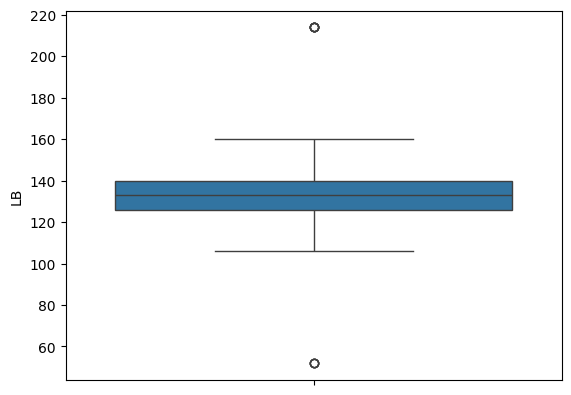

<Axes: xlabel='LB', ylabel='Density'>

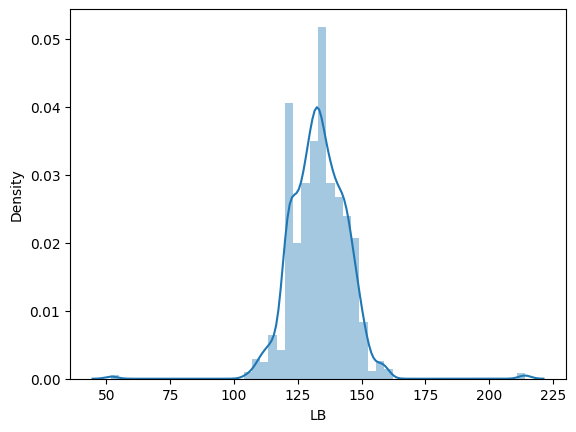

In [113]:
# Plotting boxplot and histogram for LB column
sns.boxplot(df.LB)
plt.show()
sns.distplot(df.LB)

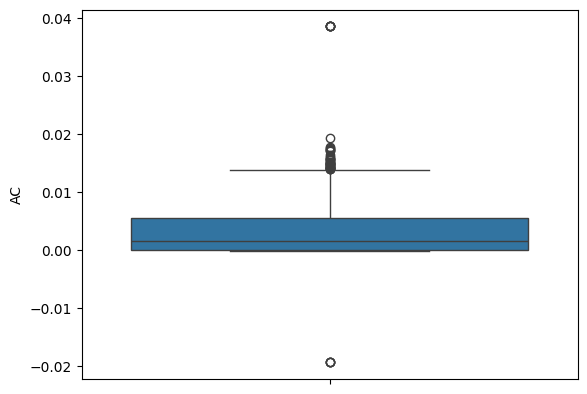

<Axes: xlabel='AC', ylabel='Density'>

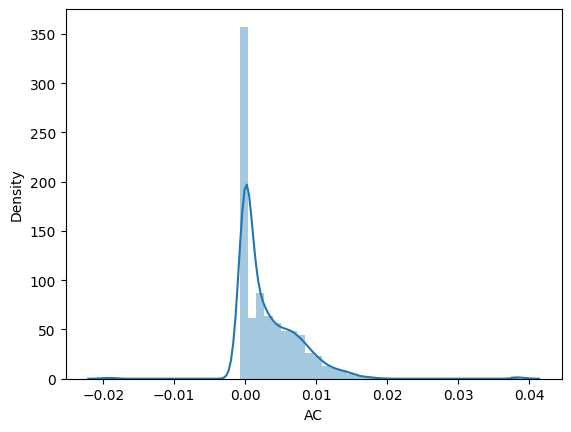

In [114]:
# Plotting boxplot and histogram for AC column
sns.boxplot(df.AC)
plt.show()
sns.distplot(df.AC)

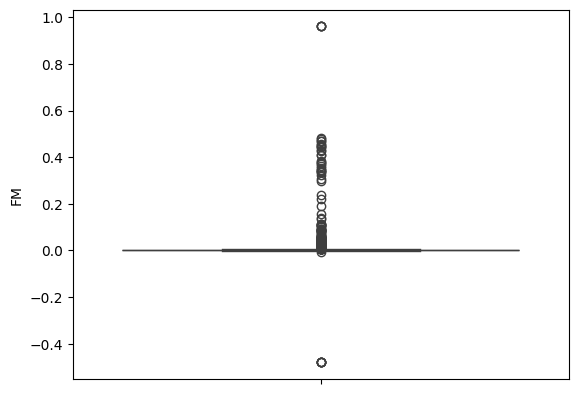

<Axes: xlabel='FM', ylabel='Density'>

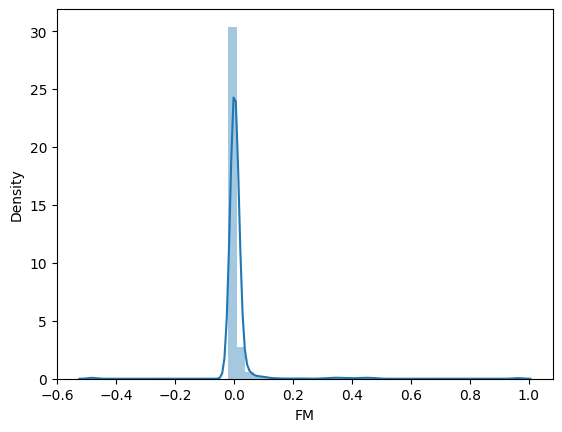

In [115]:

# Plotting boxplot and histogram for FM column
sns.boxplot(df.FM)
plt.show()
sns.distplot(df.FM)

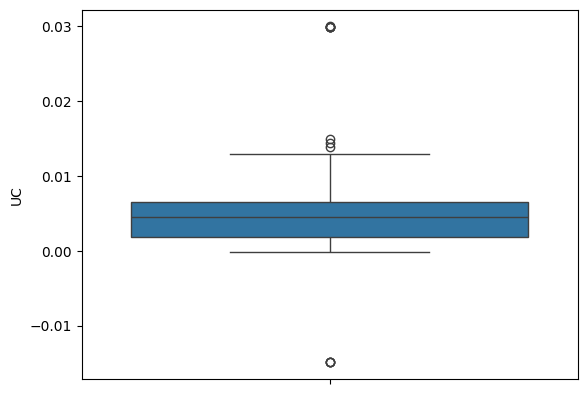

<Axes: xlabel='UC', ylabel='Density'>

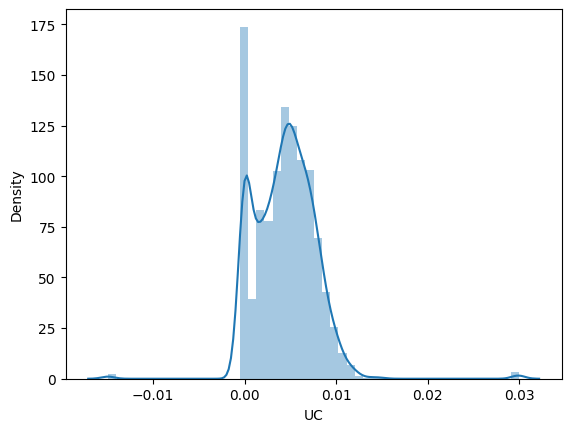

In [116]:
# Plotting boxplot and histogram for UC column
sns.boxplot(df.UC)
plt.show()
sns.distplot(df.UC)

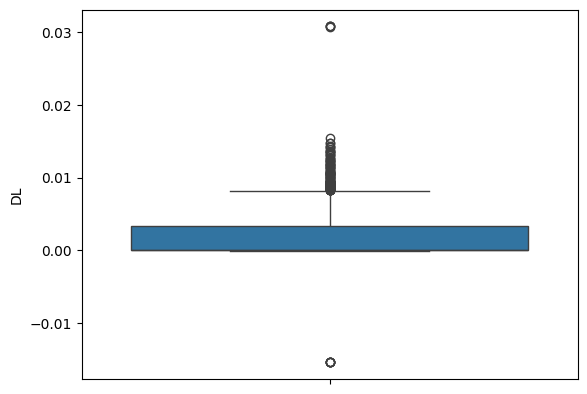

<Axes: xlabel='DL', ylabel='Density'>

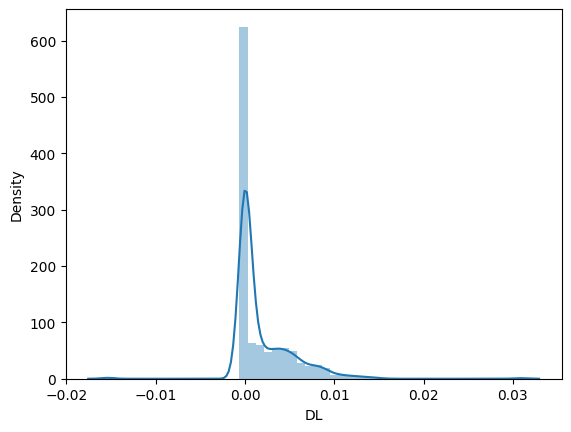

In [117]:
# Plotting boxplot and histogram for DL column
sns.boxplot(df.DL)
plt.show()
sns.distplot(df.DL)

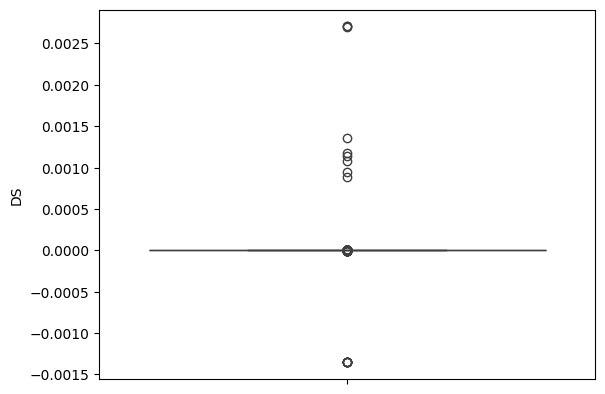

<Axes: xlabel='DS', ylabel='Density'>

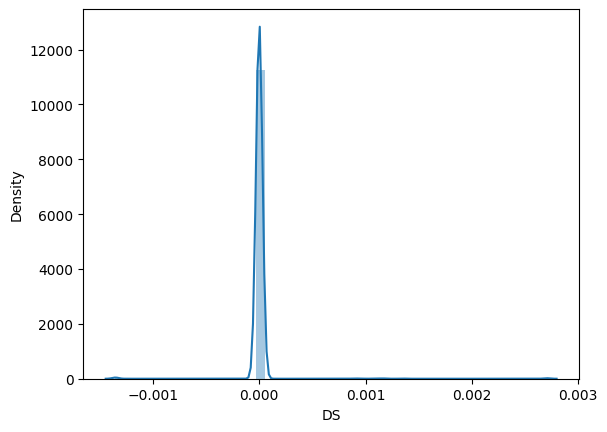

In [118]:
# Plotting boxplot and histogram for DS column
sns.boxplot(df.DS)
plt.show()
sns.distplot(df.DS)

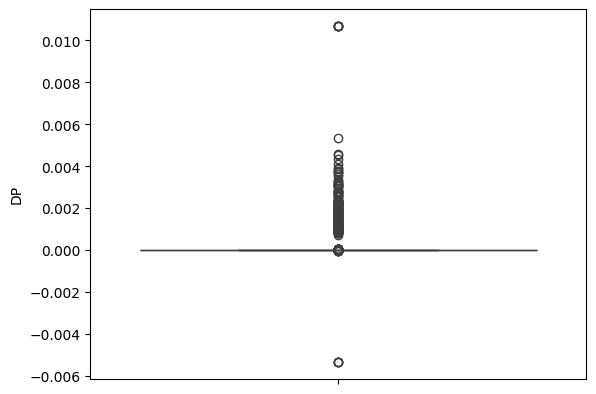

<Axes: xlabel='DP', ylabel='Density'>

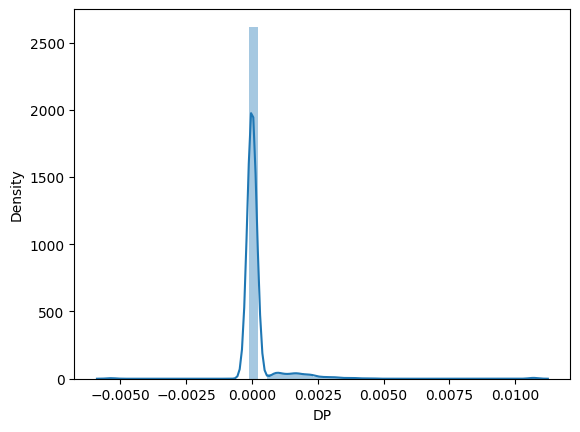

In [119]:
# Plotting boxplot and histogram for DP column
sns.boxplot(df.DP)
plt.show()
sns.distplot(df.DP)

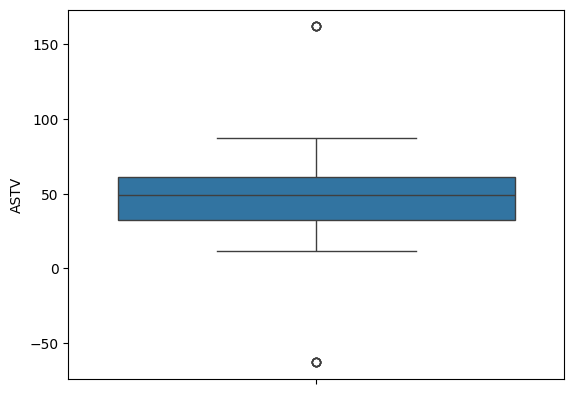

<Axes: xlabel='ASTV', ylabel='Density'>

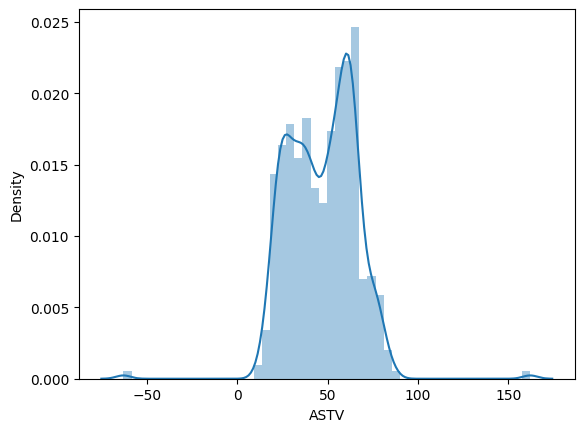

In [120]:
# Plotting boxplot and histogram for ASTV column
sns.boxplot(df.ASTV)
plt.show()
sns.distplot(df.ASTV)

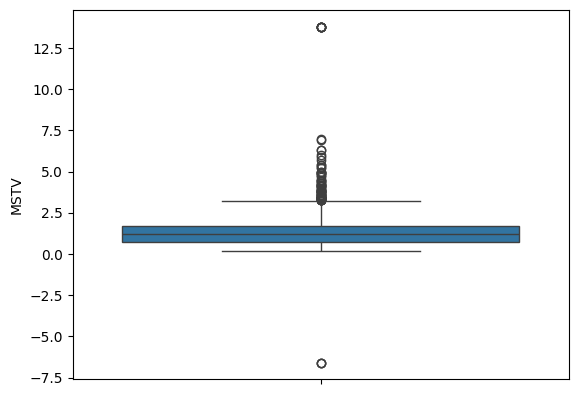

<Axes: xlabel='MSTV', ylabel='Density'>

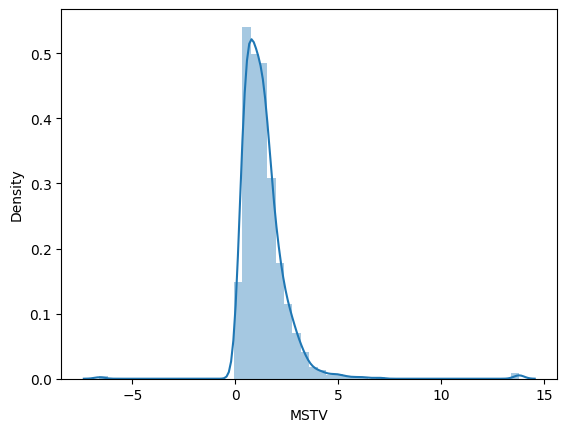

In [121]:
# Plotting boxplot and histogram for MSTV column
sns.boxplot(df.MSTV)
plt.show()
sns.distplot(df.MSTV)

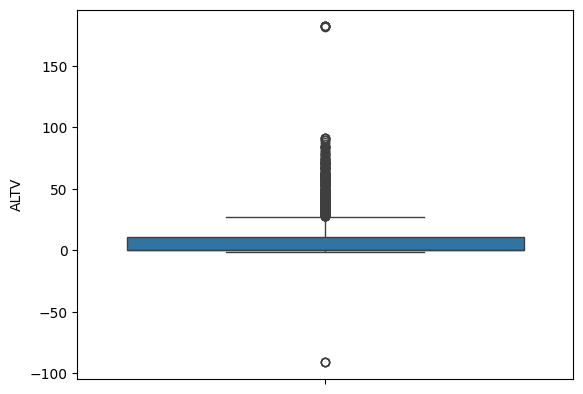

<Axes: xlabel='ALTV', ylabel='Density'>

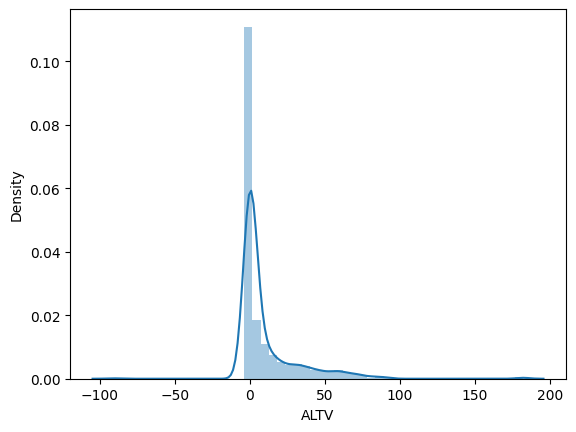

In [122]:
# Plotting boxplot and histogram for ALTV column
sns.boxplot(df.ALTV)
plt.show()
sns.distplot(df.ALTV)

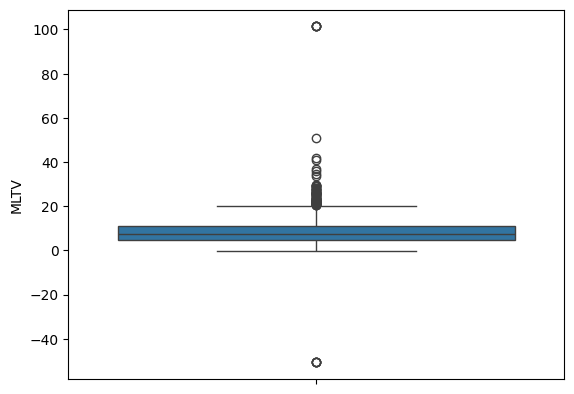

<Axes: xlabel='MLTV', ylabel='Density'>

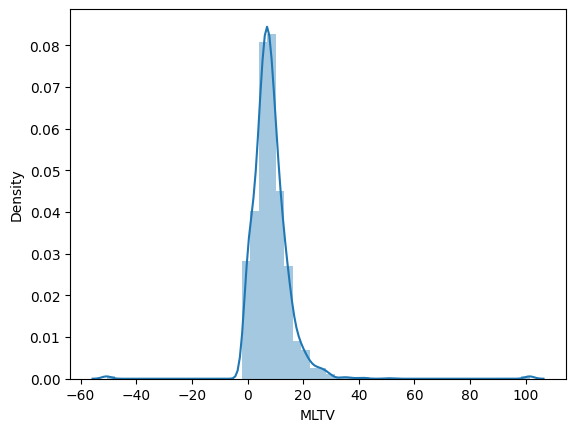

In [123]:
# Plotting boxplot and histogram for MLTV column
sns.boxplot(df.MLTV)
plt.show()
sns.distplot(df.MLTV)

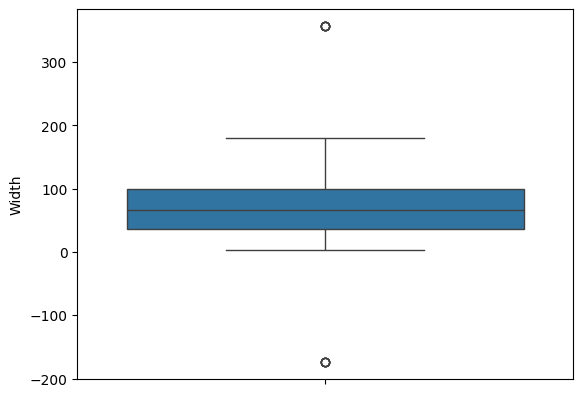

<Axes: xlabel='Width', ylabel='Density'>

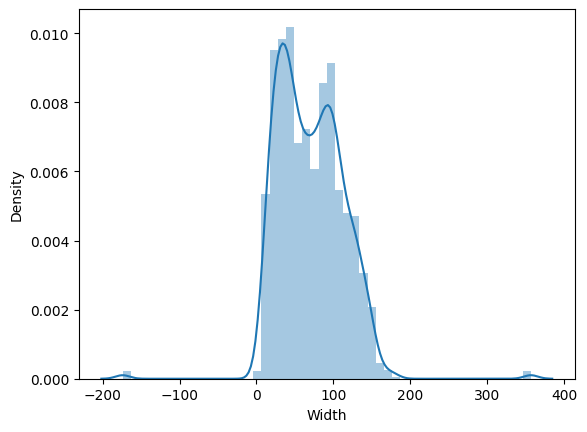

In [124]:
# Plotting boxplot and histogram for Width column
sns.boxplot(df.Width)
plt.show()
sns.distplot(df.Width)

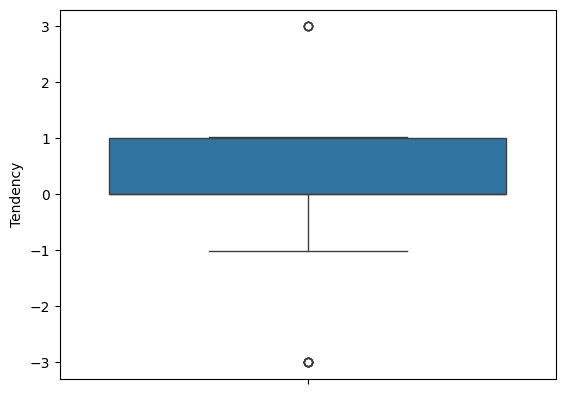

<Axes: xlabel='Tendency', ylabel='Density'>

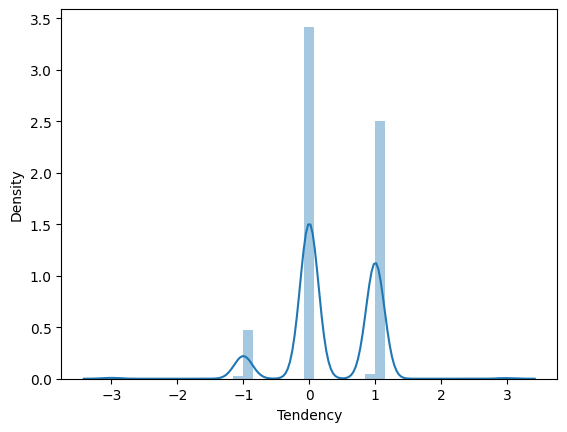

In [125]:
# Plotting boxplot and histogram for Tendency column
sns.boxplot(df.Tendency)
plt.show()
sns.distplot(df.Tendency)

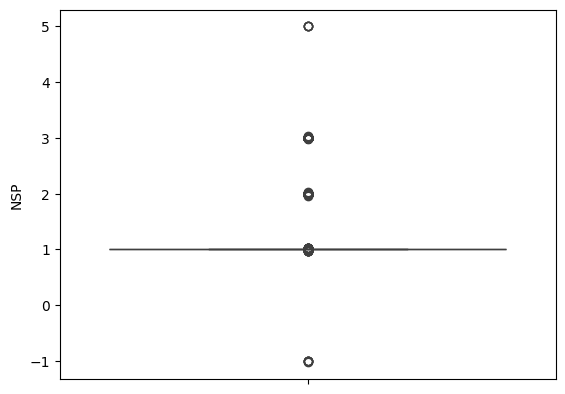

<Axes: xlabel='NSP', ylabel='Density'>

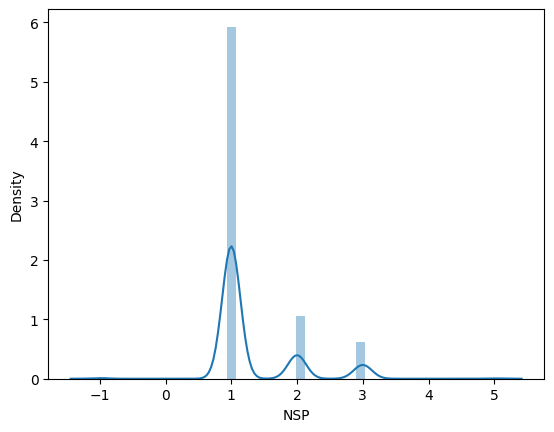

In [126]:
# Plotting boxplot and histogram for NSP column
sns.boxplot(df.NSP)
plt.show()
sns.distplot(df.NSP)

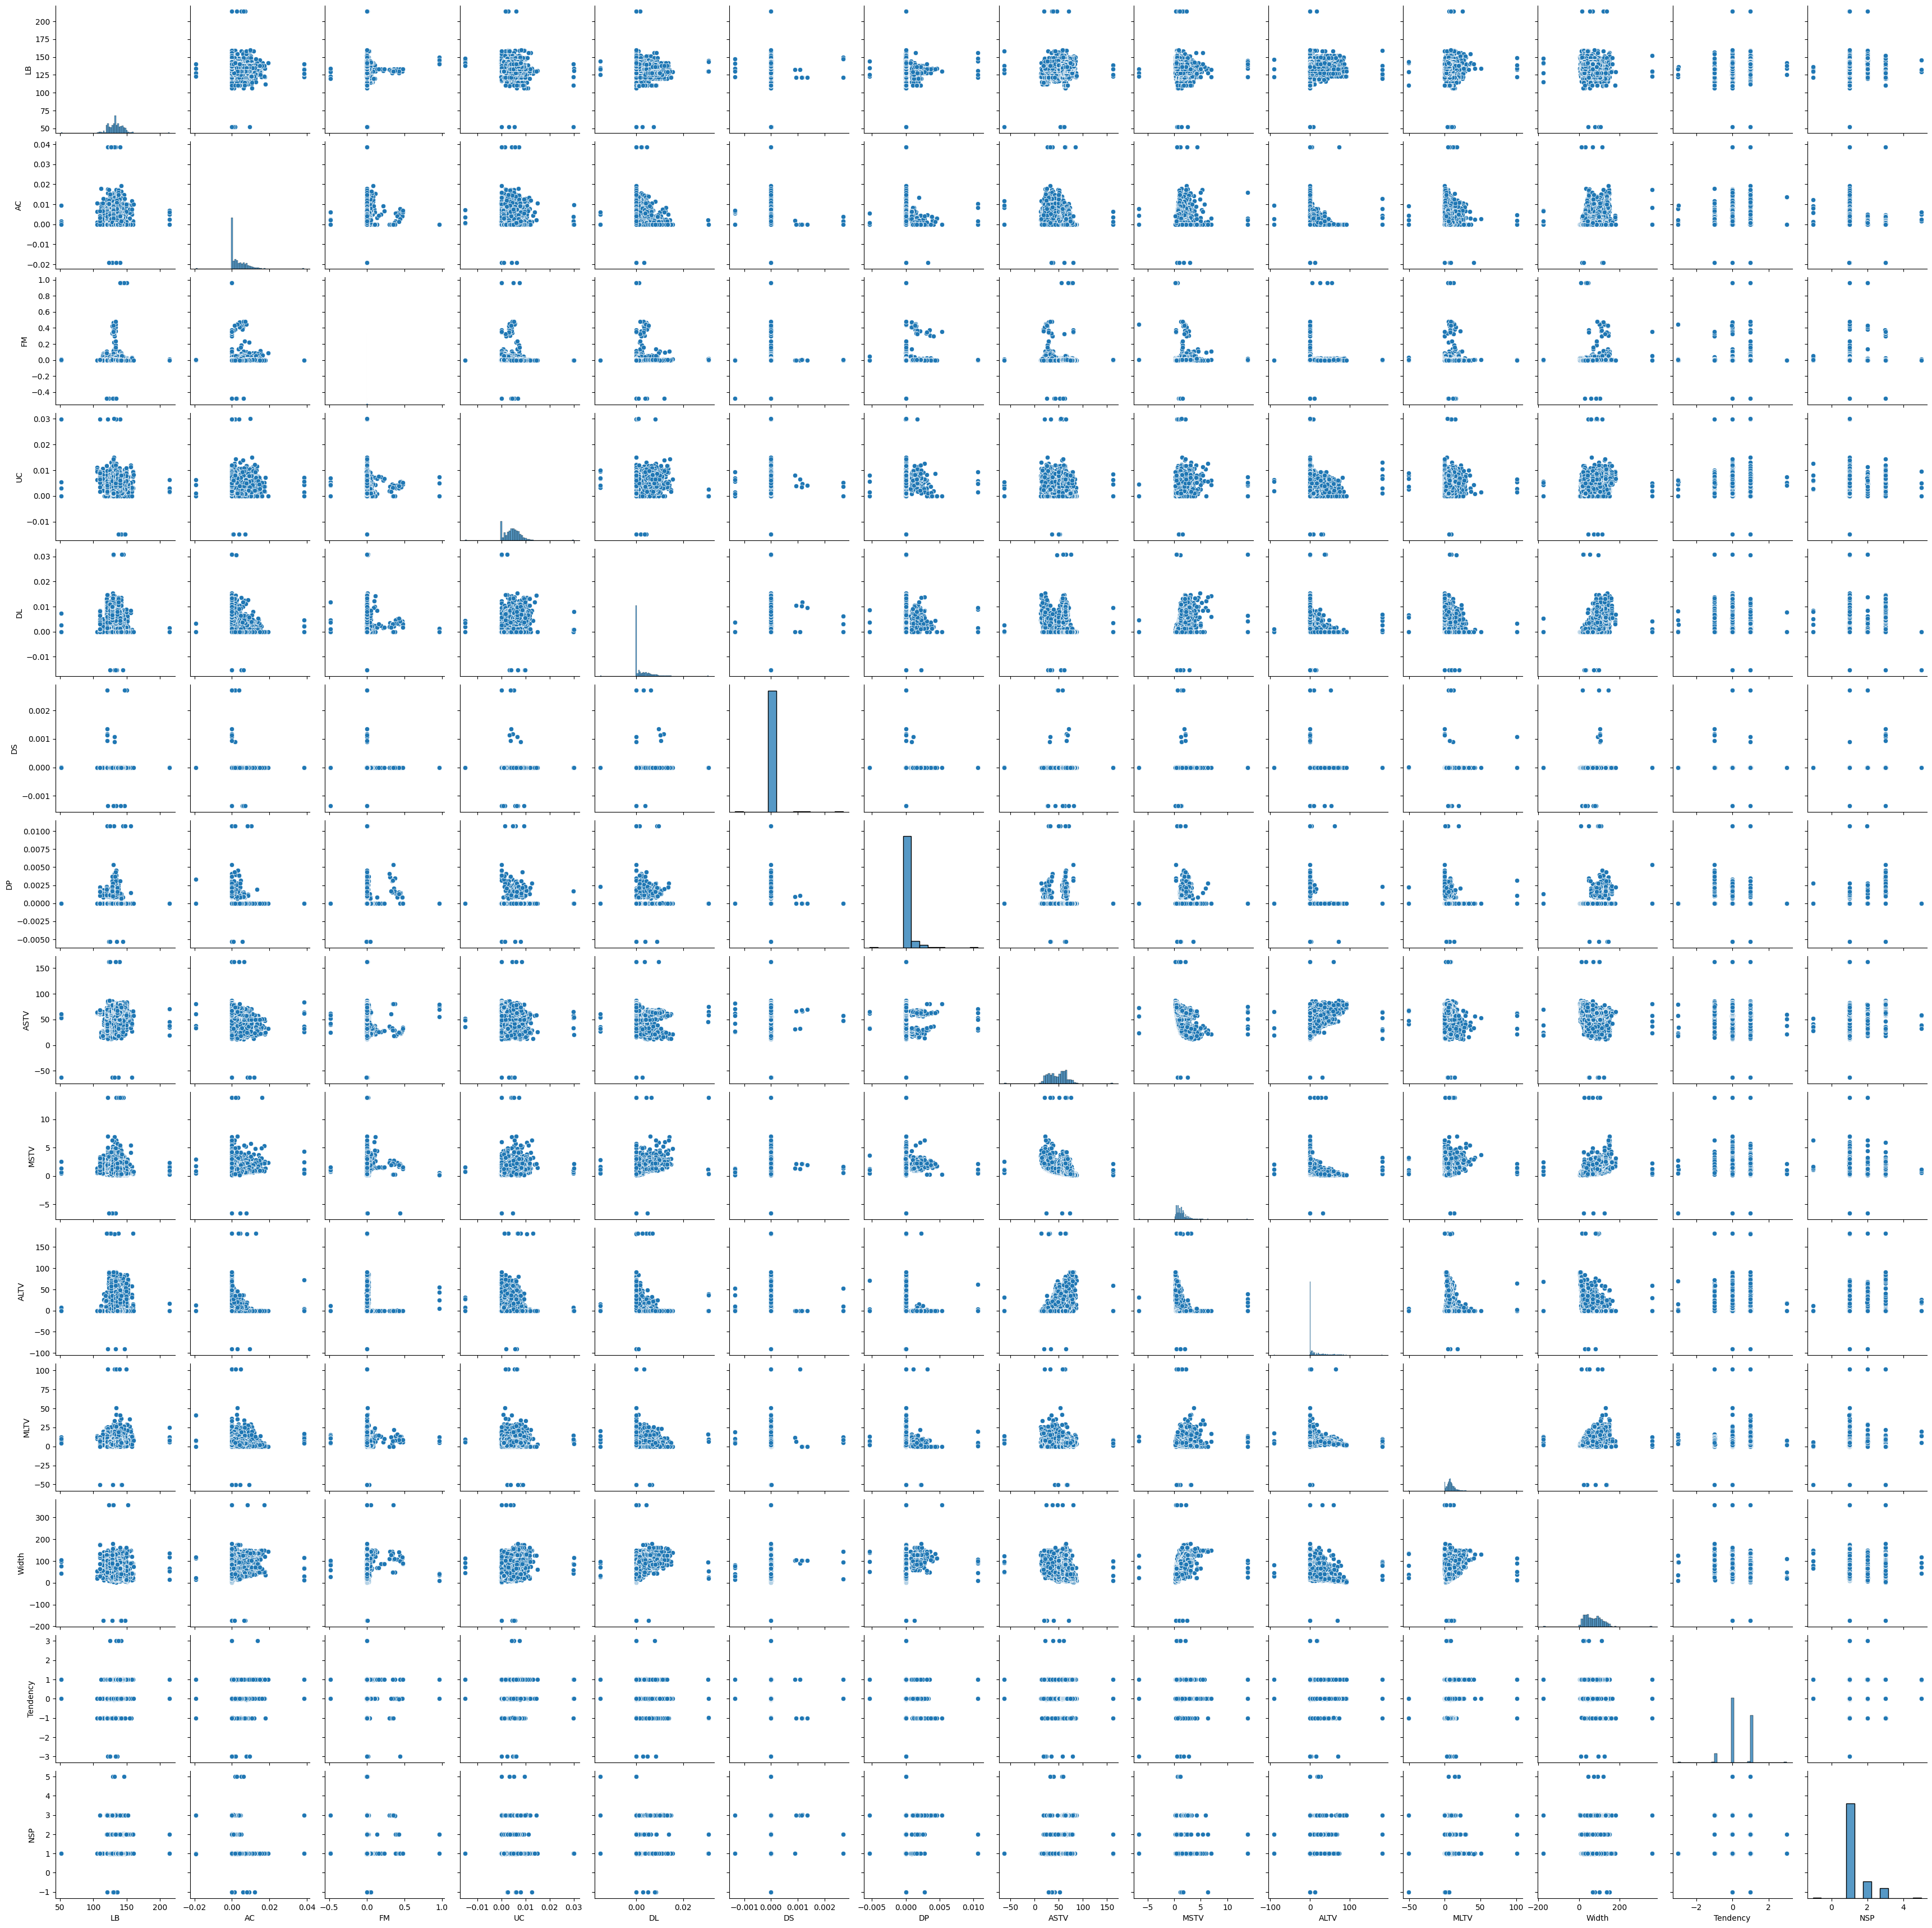

In [127]:
sns.pairplot(df)

In [128]:
df.corr()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.062813,0.018807,-0.166229,-0.126563,-0.005432,-0.047650,0.241857,-0.169647,0.210542,-0.003423,-0.118397,0.236730,0.131839
AC,-0.062813,1.000000,0.009768,0.071621,-0.093449,-0.033088,-0.083298,-0.230470,0.132962,-0.269807,-0.104853,0.234549,0.031710,-0.311689
FM,0.018807,0.009768,1.000000,-0.053226,0.009718,0.029916,0.121459,-0.032691,0.017055,-0.011936,-0.006121,0.097282,-0.017819,0.074446
UC,-0.166229,0.071621,-0.053226,1.000000,0.190128,-0.006938,0.070295,-0.181161,0.189406,-0.227304,-0.049452,0.107083,-0.066832,-0.185229
DL,-0.126563,-0.093449,0.009718,0.190128,1.000000,0.058413,0.144717,-0.069361,0.410102,-0.186967,-0.165293,0.408578,-0.023914,0.024879
DS,-0.005432,-0.033088,0.029916,-0.006938,0.058413,1.000000,0.004321,0.008426,0.016026,-0.004335,0.034367,0.040845,-0.015294,0.065411
DP,-0.047650,-0.083298,0.121459,0.070295,0.144717,0.004321,1.000000,0.038119,0.118628,-0.076975,-0.113818,0.175462,-0.129204,0.295057
ASTV,0.241857,-0.230470,-0.032691,-0.181161,-0.069361,0.008426,0.038119,1.000000,-0.293882,0.357497,-0.219709,-0.206931,-0.010855,0.420873
MSTV,-0.169647,0.132962,0.017055,0.189406,0.410102,0.016026,0.118628,-0.293882,1.000000,-0.291935,0.028452,0.432822,-0.038017,-0.095876
ALTV,0.210542,-0.269807,-0.011936,-0.227304,-0.186967,-0.004335,-0.076975,0.357497,-0.291935,1.000000,-0.107200,-0.345732,0.038234,0.366454


<Axes: >

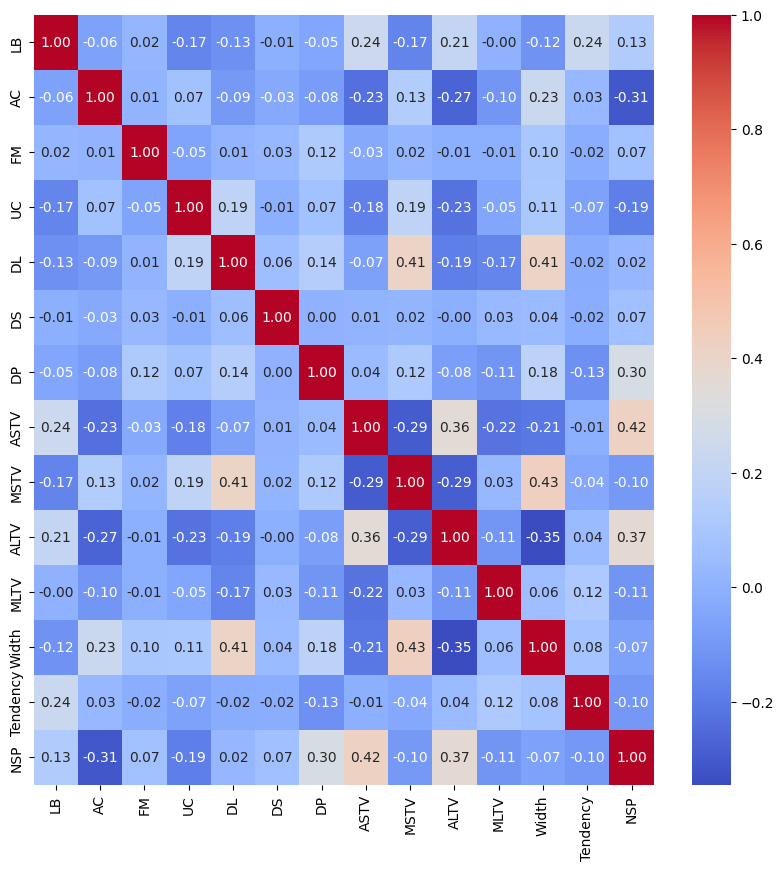

In [129]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True,fmt= '.2f',cmap='coolwarm')

### Conclusion:

In [139]:
# Key Insights and Patterns:

# Outliers: Several columns, including 'LB', 'AC', 'FM', and others, exhibit outliers.
# These outliers could represent genuine extreme values or potential errors in data collection.

# Data Distribution: The distribution of variables varies. Some, like 'LB' and 'AC', show a relatively normal distribution,
# while others like 'FM' and 'DS' are heavily skewed.

# Correlations: There are notable correlations between certain variables. For instance, 'Width' and 'MSTV' show a positive correlation,
# suggesting a potential relationship between fetal movement patterns and the width of certain measurements.

# Zero Values: Some variables, such as 'FM', 'DL', 'DS', and others, have a significant number of zero values.
# This could indicate a specific condition or measurement limitation.

# Impact on Decision-Making and Further Analyses:

# Outlier Handling: Depending on the nature of outliers, decisions need to be made regarding their treatment.
# They could be removed, replaced with more representative values, or analyzed separately.

# Feature Selection: The correlation analysis can guide feature selection for predictive modeling.
# Highly correlated variables might be redundant and could be reduced.

# Model Choice: The distribution of variables can influence the choice of statistical models.
# Skewed distributions might require transformations or specific model types.


# Further Analyses:

# Investigating Outliers: Further investigation is needed to understand the nature of outliers and their potential impact on analysis.

# Handling Skewed Distributions: Transformations or non-parametric methods might be considered for variables with skewed distributions.

# Predictive Modeling: The insights gained can be used to develop predictive models for fetal health outcomes.

# Clinical Interpretation: Collaboration with medical professionals is crucial to interpret the findings in a clinical context and validate their practical significance.
